# Import Dependencies

In [3300]:
# System
import os

# Data Analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

import tensorflow as tf

import csv
import pickle

# Get Data

In [3301]:
file_path = os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/cutfree-simulations/runtime_data_v2.csv"
df_original = pd.read_csv(file_path)
df = df_original.copy()
df.iloc[0]

Oligo                        NNNNNN
OligoLength                       6
Sites                   Any["YATR"]
TotalSites                        1
SiteLength                        4
CutFree_Randomer             NBNVVN
CutFree_Degeneracy          7.45472
CutFree_Time               0.006211
CutFreeRL_Randomer           NNVVVN
CutFreeRL_Degeneracy        7.45472
CutFreeRL_Time             0.228063
Name: 0, dtype: object

In [3302]:
df.loc[(df["OligoLength"] == 6) & (df["TotalSites"] == 1) & (df["SiteLength"] == 4)]

,Oligo,OligoLength,Sites,TotalSites,SiteLength,CutFree_Randomer,CutFree_Degeneracy,CutFree_Time,CutFreeRL_Randomer,CutFreeRL_Degeneracy,CutFreeRL_Time
0,NNNNNN,6,"Any[""YATR""]",1,4,NBNVVN,7.454720,0.006211,NNVVVN,7.454720,0.228063
1750,NNNNNN,6,"Any[""GATC""]",1,4,HNNNDD,7.454720,0.006383,NNNDDD,7.454720,0.225150
3500,NNNNNN,6,"Any[""GGCC""]",1,4,NHNNDN,7.742402,0.007255,NNNDND,7.742402,0.080954


# Data Classification

In [3303]:
random_state = np.random.randint(0, 10000)
random_state #93

9549

In [3304]:
conditions = [
    (df["CutFree_Time"] <= df["CutFreeRL_Time"]),
    (df["CutFree_Time"] > df["CutFreeRL_Time"])
]

values = [0, 1] # 0 = CutFree, 1 = CutFreeRL

df["Algorithm"] = np.select(conditions, values)
df = df[["OligoLength", "TotalSites", "SiteLength", "Algorithm", "CutFree_Time", "CutFreeRL_Time"]]
df

c:\Users\wrick\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,OligoLength,TotalSites,SiteLength,Algorithm,CutFree_Time,CutFreeRL_Time
0,6,1,4,0,0.006211,0.228063
1,6,2,4,0,0.007820,0.087950
2,6,3,4,0,0.010071,0.136403
3,6,4,4,0,0.013531,0.150443
4,6,5,4,0,0.013882,0.183784
...,...,...,...,...,...,...
5244,40,6,8,1,12.737720,4.200124
5245,40,7,8,1,60.120769,3.009765
5246,40,8,8,1,60.379011,3.989743
5247,40,9,8,1,60.156297,3.611050


# Rejection Sampling

In [3305]:
numCutFree = df[df.Algorithm == 0].shape[0]
print(numCutFree)

numCutFreeRL = df[df.Algorithm == 1].shape[0]
print(numCutFreeRL)

3731
1518


In [3306]:
df_rejection = df[df.Algorithm == 0].sample(numCutFree-numCutFreeRL, random_state=random_state)
df = df.drop(df_rejection.index)
df

,OligoLength,TotalSites,SiteLength,Algorithm,CutFree_Time,CutFreeRL_Time
0,6,1,4,0,0.006211,0.228063
1,6,2,4,0,0.007820,0.087950
2,6,3,4,0,0.010071,0.136403
3,6,4,4,0,0.013531,0.150443
4,6,5,4,0,0.013882,0.183784
...,...,...,...,...,...,...
5244,40,6,8,1,12.737720,4.200124
5245,40,7,8,1,60.120769,3.009765
5246,40,8,8,1,60.379011,3.989743
5247,40,9,8,1,60.156297,3.611050


In [3307]:
numCutFree = df[df.Algorithm == 0].shape[0]
print(numCutFree)

numCutFreeRL = df[df.Algorithm == 1].shape[0]
print(numCutFreeRL)

1518
1518


In [3308]:
df_total = df.copy()
df = df[["OligoLength", "TotalSites", "SiteLength", "Algorithm"]]

# Visualize Data

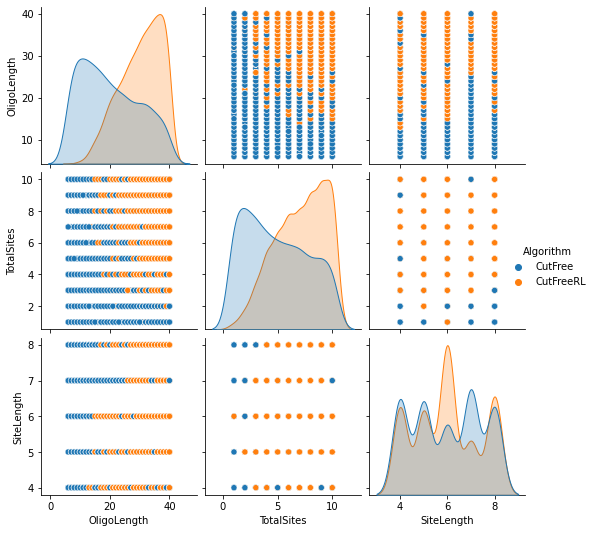

In [3309]:
pair_plot = sns.pairplot(df, hue="Algorithm", diag_kind="kde")
new_labels = ["CutFree", "CutFreeRL"]
for t, l in zip(pair_plot._legend.texts, new_labels):
    t.set_text(l)
plt.show(pair_plot)

# Get Train/Test Split

In [3310]:
x = df.drop(["Algorithm"], axis=1)
y = df["Algorithm"]

In [3311]:
x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(x, y, test_size=0.2, random_state=random_state)
x_train_df.head()

,OligoLength,TotalSites,SiteLength
1539,36,10,7
4896,33,8,8
3284,36,5,7
3023,31,4,6
4608,28,9,4


In [3312]:
y_train_df.head()

1539    1
4896    1
3284    1
3023    1
4608    1
Name: Algorithm, dtype: int32

In [3313]:
x_train, y_train = tf.convert_to_tensor(x_train_df, dtype=tf.float32), tf.convert_to_tensor(y_train_df, dtype=tf.float32)
x_test, y_test = tf.convert_to_tensor(x_test_df, dtype=tf.float32), tf.convert_to_tensor(y_test_df, dtype=tf.float32)

In [3314]:
x_train

<tf.Tensor: shape=(2428, 3), dtype=float32, numpy=
array([[36., 10.,  7.],
       [33.,  8.,  8.],
       [36.,  5.,  7.],
       ...,
       [25.,  3.,  5.],
       [31.,  3.,  6.],
       [37.,  7.,  7.]], dtype=float32)>

# Machine Learning

### Accuracy Function

In [3315]:
def get_accuracy(pred, true):
    test_accuracy = accuracy_score(pred, true)*100
    print("Accuracy: {:.2f}%".format(test_accuracy))
    return test_accuracy

### TensorFlow NN

In [3316]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="tanh", input_shape=(3,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 128)               512       
                                                                 
 batch_normalization_61 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_123 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 897
Non-trainable params: 256
_________________________________________________________________


In [3317]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

model.compile(
    optimizer, 
    loss="mse", 
    metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
76/76 [==============================] - 1s 3ms/step - loss: 0.4862 - accuracy: 0.2768 - val_loss: 0.3869 - val_accuracy: 0.3947
Epoch 2/30
76/76 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.2867 - val_loss: 0.3754 - val_accuracy: 0.3372
Epoch 3/30
76/76 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.2829 - val_loss: 0.3663 - val_accuracy: 0.3273
Epoch 4/30
76/76 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.2904 - val_loss: 0.3568 - val_accuracy: 0.3306
Epoch 5/30
76/76 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.3105 - val_loss: 0.3455 - val_accuracy: 0.3487
Epoch 6/30
76/76 [==============================] - 0s 1ms/step - loss: 0.3874 - accuracy: 0.3270 - val_loss: 0.3323 - val_accuracy: 0.4178
Epoch 7/30
76/76 [==============================] - 0s 1ms/step - loss: 0.3662 - accuracy: 0.3583 - val_loss: 0.3185 - val_accuracy: 0.4885
Epoch 8/30
76/76 [==

In [3318]:
y_pred_tf = np.round(model.predict(x_test)).reshape(1, -1)[0]
tf_acc = get_accuracy(y_pred_tf, y_test)

19/19 [==============================] - 0s 667us/step
Accuracy: 79.61%


### Plot Loss and Accuracy Curves

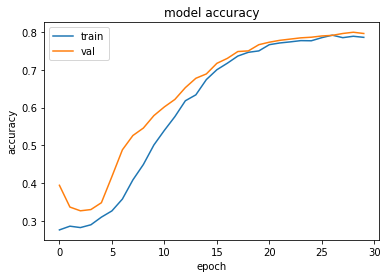

In [3319]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

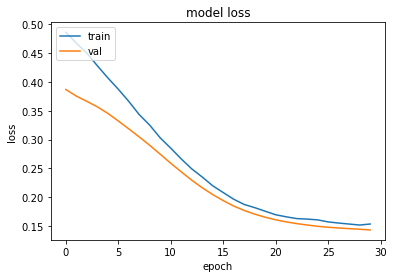

In [3320]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### MLP Classifier NN

In [3321]:
class_NN = MLPClassifier(
    hidden_layer_sizes=(128),
    batch_size=32,
    activation='tanh',
    solver='adam',
    alpha=1e-5,
    learning_rate='adaptive',
    max_iter=1000, 
    verbose=0,
    random_state=random_state)
class_NN.fit(x_train, y_train)

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=32,
              hidden_layer_sizes=128, learning_rate='adaptive', max_iter=1000,
              random_state=9549, verbose=0)

In [3322]:
y_pred = class_NN.predict(x_test)
mlp_acc = get_accuracy(y_pred, y_test)

Accuracy: 79.61%


In [3323]:
x_test[0]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([9., 2., 4.], dtype=float32)>

### Grid Search to Find Optimal Parameters

In [3324]:
params = {
    #'hidden_layer_sizes' : [128],
    #'activation' : ['tanh', 'relu'],
    #'solver' : ['adam', 'sgd']
    #'learning_rate' : ['adaptive', 'constant'],
    'alpha' : [1e-8, 1e-7],
}

gscv = GridSearchCV(class_NN, params, verbose=1)

# gscv.fit(np.array(x_train), np.array(y_train))
# print(gscv.best_params_) 

### Analyze Results

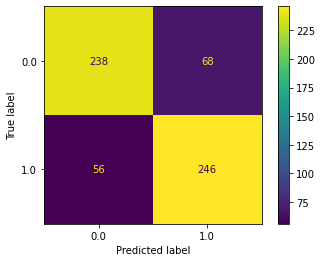

In [3325]:
plot_confusion_matrix(class_NN, x_test, y_test)  
plt.show()

In [3326]:
print(classification_report(y_pred, y_test, target_names=["CutFree", "CutFreeRL"]))

              precision    recall  f1-score   support

     CutFree       0.78      0.81      0.79       294
   CutFreeRL       0.81      0.78      0.80       314

    accuracy                           0.80       608
   macro avg       0.80      0.80      0.80       608
weighted avg       0.80      0.80      0.80       608



# Visualize Incorrect Classifications

In [3327]:
df_total.head()

,OligoLength,TotalSites,SiteLength,Algorithm,CutFree_Time,CutFreeRL_Time
0,6,1,4,0,0.006211,0.228063
1,6,2,4,0,0.007820,0.087950
2,6,3,4,0,0.010071,0.136403
3,6,4,4,0,0.013531,0.150443
4,6,5,4,0,0.013882,0.183784


In [3328]:
df_total["Discrepency"] = df_total.CutFree_Time - df_total.CutFreeRL_Time
df_total = df_total.sort_values(by=["Discrepency"], ascending=True)
df_total.head()

,OligoLength,TotalSites,SiteLength,Algorithm,CutFree_Time,CutFreeRL_Time,Discrepency
5238,40,10,7,0,0.919619,3.840002,-2.920383
3438,39,9,7,0,0.642305,3.527832,-2.885527
1447,34,8,8,0,0.525760,3.372835,-2.847075
1239,30,10,7,0,0.290017,3.013270,-2.723253
2989,30,10,7,0,0.238599,2.892359,-2.653759


In [3329]:
df_total_tf = df_total.copy()

df_total_tf.loc[x_test_df.index[np.where(y_test_df != y_pred_tf)], "Prediction"] = 0
df_total_tf.loc[df_total_tf["Prediction"].isna(), "Prediction"] = 1

df_total_tf = df_total_tf.reset_index(drop=True)


In [3330]:
df_total.loc[x_test_df.index[np.where(y_test_df != y_pred)], "Prediction"] = 0
df_total.loc[df_total["Prediction"].isna(), "Prediction"] = 1


In [3331]:
df_total = df_total.reset_index(drop=True)
df_total.head()

,OligoLength,TotalSites,SiteLength,Algorithm,CutFree_Time,CutFreeRL_Time,Discrepency,Prediction
0,40,10,7,0,0.919619,3.840002,-2.920383,1.0
1,39,9,7,0,0.642305,3.527832,-2.885527,1.0
2,34,8,8,0,0.525760,3.372835,-2.847075,1.0
3,30,10,7,0,0.290017,3.013270,-2.723253,0.0
4,30,10,7,0,0.238599,2.892359,-2.653759,1.0


In [3332]:
rgb = []
for _ in df_total[df_total.Algorithm==0].index:
    c = [46/255, 108/255 , 190/255]
    rgb.append(c)

rgb2 = []
for _ in df_total[df_total.Algorithm==1].index:
    c = [220/255, 77/255 , 58/255]
    rgb2.append(c)

In [3333]:
import matplotlib.font_manager as font_manager
gfont = {'fontname':'Georgia'}
font = font_manager.FontProperties(family='Georgia', style='normal', size=32)

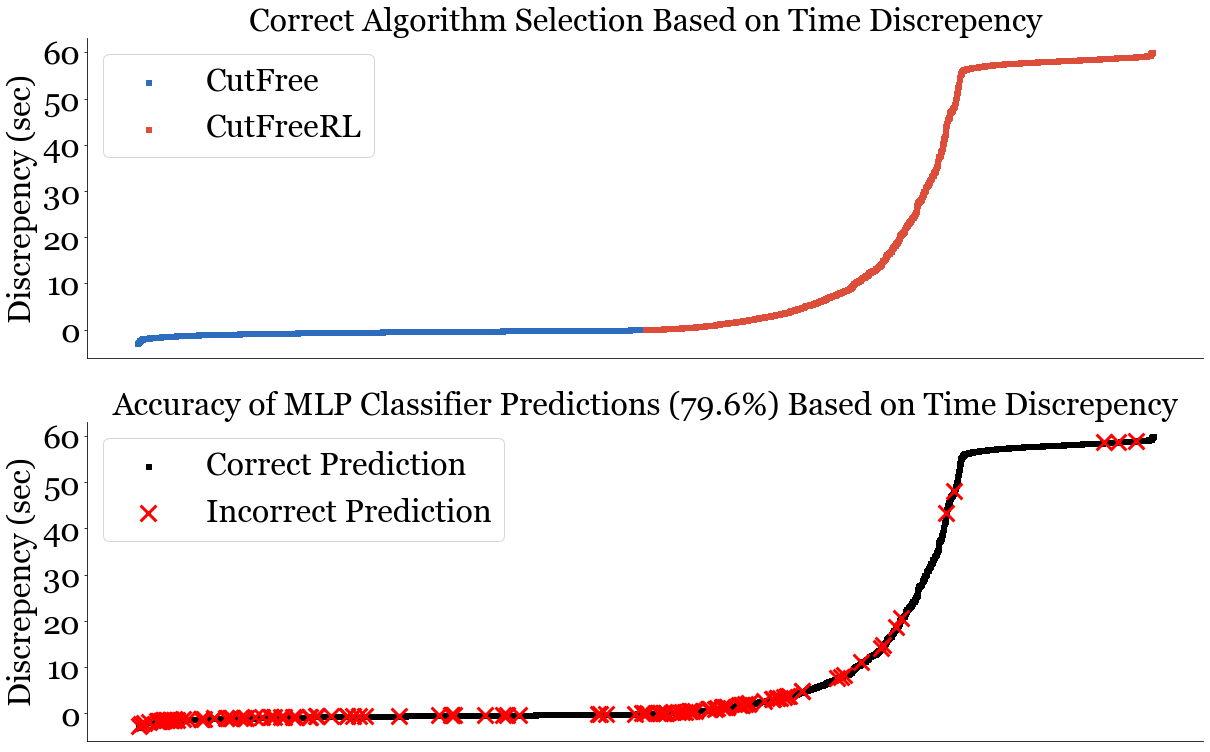

In [3334]:
plt.figure(figsize=(20,20))

plt.subplot(311)

plt.scatter(
    df_total[df_total.Algorithm==0].index, df_total[df_total.Algorithm==0].Discrepency, 
    c = rgb,
    linewidths = 1,
    marker ="s",
    s = 25)

plt.scatter(
    df_total[df_total.Algorithm==1].index, df_total[df_total.Algorithm==1].Discrepency, 
    c =rgb2,
    linewidths = 1,
    marker ="s",
    s = 25)

plt.title("Correct Algorithm Selection Based on Time Discrepency", fontsize=32, **gfont)
plt.ylabel("Discrepency (sec)", fontsize=32, **gfont)
plt.legend(["CutFree", "CutFreeRL"], prop=font)
ax = plt.gca()
plt.xticks(fontsize=32, **gfont)
plt.yticks(fontsize=32, **gfont)
ax.get_xaxis().set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.subplot(312)
plt.scatter(
    df_total[df_total.Prediction==1].index, df_total[df_total.Prediction==1].Discrepency, 
    c = "k",
    linewidths = 1,
    marker ="s",
    s = 25)

plt.scatter(
    df_total[df_total.Prediction==0].index, df_total[df_total.Prediction==0].Discrepency, 
    c ="red",
    linewidths = 3,
    marker ="x",
    s = 250)

plt.title(f"Accuracy of MLP Classifier Predictions ({mlp_acc:.1f}%) Based on Time Discrepency", fontsize=32, **gfont)
plt.ylabel("Discrepency (sec)", fontsize=32, **gfont)
plt.legend(["Correct Prediction", "Incorrect Prediction"], prop=font)
ax = plt.gca()
plt.xticks(fontsize=32, **gfont)
plt.yticks(fontsize=32, **gfont)
ax.get_xaxis().set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# plt.subplot(313)
# plt.scatter(
#     df_total_tf[df_total_tf.Prediction==1].index, df_total_tf[df_total_tf.Prediction==1].Discrepency, 
#     c ="black",
#     linewidths = 1,
#     marker ="s",
#     s = 25)

# plt.scatter(
#     df_total_tf[df_total_tf.Prediction==0].index, df_total_tf[df_total_tf.Prediction==0].Discrepency, 
#     c ="red",
#     linewidths = 3,
#     marker ="x",
#     s = 250)

# plt.title(f"Accuracy of TensforFlow Model Predictions ({tf_acc:.2f}%) for Time Discrepency vs. Index")
# plt.xlabel("Index")
# plt.ylabel("Time Discrepency (sec)")
# plt.legend(["Correct Prediction", "Incorrect Prediction"])


In [3335]:
print(class_NN)

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=32,
              hidden_layer_sizes=128, learning_rate='adaptive', max_iter=1000,
              random_state=9549, verbose=0)


# Get Results

In [3336]:
with open("results/accuracy_results.csv", "a") as f:
    writer = csv.writer(f)
    writer.writerow([mlp_acc])

In [3337]:
average_acc = np.array([])
n = 0

with open("results/accuracy_results.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        if row != []:
            average_acc = np.append(average_acc, float(row[0]))
            n += 1

print(f"Average Accuracy: {average_acc.mean():.5f} +/- {average_acc.std():.5f}")
print(f"Number of Trials: {n}")

Average Accuracy: 80.75658 +/- 1.66493
Number of Trials: 17


In [3338]:
false_positives = df_total[df_total.Prediction==0].CutFree_Time > 60
false_positives = false_positives[false_positives==True].count()

true_positives = df_total[df_total.Prediction==1].CutFree_Time > 60
true_positives = true_positives[true_positives==True].count()

sensitivity = true_positives / (true_positives + false_positives)

In [3339]:
with open("results/sensitivity_results.csv", "a") as f:
    writer = csv.writer(f)
    writer.writerow([sensitivity])

In [3340]:
average_sensitivity = np.array([])
n = 0

with open("results/sensitivity_results.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        if row != []:
            average_sensitivity = np.append(average_sensitivity, float(row[0]))
            n += 1

print(f"Average Sensitivity: {average_sensitivity.mean():.5f} +/- {average_sensitivity.std():.5f}")
print(f"Number of Trials: {n}")

Average Sensitivity: 0.99791 +/- 0.00287
Number of Trials: 17


# Ensemble Model

In [3341]:
incorrect_cutfree = df_total[df_total.Prediction == 0][df_total.Algorithm == 1]
incorrect_cutfree.shape

C:\Users\wrick\AppData\Local\Temp/ipykernel_19420/2532155634.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incorrect_cutfree = df_total[df_total.Prediction == 0][df_total.Algorithm == 1]


(56, 8)

In [3342]:
cutfree_total = df_total[df_total.Prediction == 1][df_total.Algorithm == 0]
cutfree_total.shape

C:\Users\wrick\AppData\Local\Temp/ipykernel_19420/3990438713.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cutfree_total = df_total[df_total.Prediction == 1][df_total.Algorithm == 0]


(1450, 8)

In [3343]:
#incorrect_cutfree = incorrect_cutfree.append(cutfree_total)

In [3344]:
with open("../cutfree-models/cutfree_runtime_classification_model.pkl", "rb") as f:
    model = pickle.load(f)

df_not_fixed = incorrect_cutfree.copy()
df_fixed = incorrect_cutfree.copy()

fixed = 0
for i in range(len(incorrect_cutfree)):
    correct = model.predict([[int(incorrect_cutfree.iloc[i].OligoLength), int(incorrect_cutfree.iloc[i].TotalSites), int(incorrect_cutfree.iloc[i].SiteLength)]])

    if correct == 0:
        df_not_fixed.drop(incorrect_cutfree.iloc[i].name, inplace=True)
        fixed += 1
    else:
        df_fixed.drop(incorrect_cutfree.iloc[i].name, inplace=True)

print(f"Fixed {fixed} incorrect predictions")
df_not_fixed

Fixed 8 incorrect predictions


,OligoLength,TotalSites,SiteLength,Algorithm,CutFree_Time,CutFreeRL_Time,Discrepency,Prediction
1524,35,2,4,1,0.633275,0.621732,0.011543,0.0
1556,15,4,6,1,0.649979,0.574511,0.075468,0.0
1561,15,10,4,1,0.302598,0.216150,0.086448,0.0
1562,19,8,8,1,1.282868,1.195143,0.087724,0.0
1573,36,2,5,1,1.062386,0.940312,0.122074,0.0
1580,23,4,8,1,1.398099,1.259087,0.139012,0.0
1581,39,1,6,1,1.473049,1.333725,0.139323,0.0
1602,15,5,6,1,0.881788,0.652319,0.229468,0.0
1614,19,6,6,1,1.149420,0.878769,0.270652,0.0
1628,20,6,8,1,1.699099,1.354435,0.344665,0.0


In [3345]:
df_fixed.shape

(8, 8)

In [3346]:
new_accuracy = ((accuracy_score(y_pred, y_test)) + (fixed/len(y_test))) *100
print("Accuracy: {:.2f}%".format(new_accuracy))


Accuracy: 80.92%


In [3347]:
df_total = df_total[df_total.Algorithm == 1]

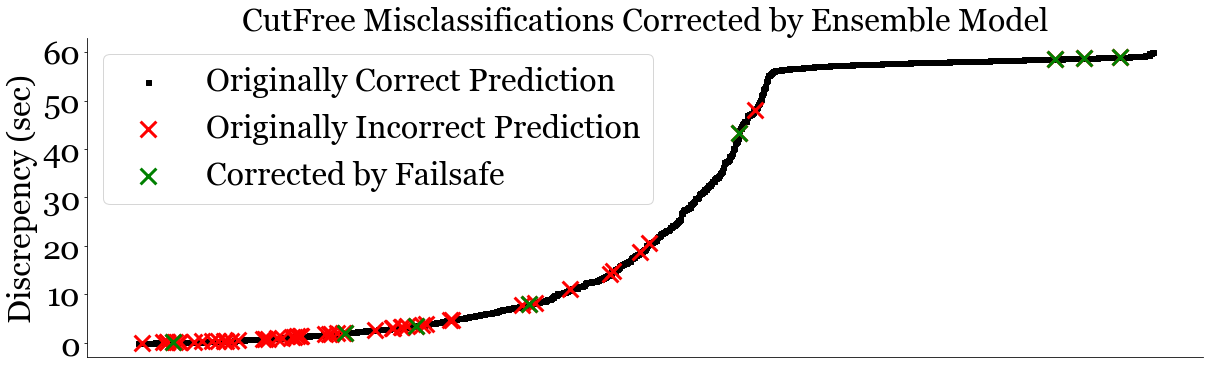

In [3348]:
plt.figure(figsize=(20,20))

plt.subplot(311)

plt.scatter(
    df_total[df_total.Prediction==1].index, df_total[df_total.Prediction==1].Discrepency, 
    c = "k",
    linewidths = 1,
    marker ="s",
    s = 25)

plt.scatter(
    df_total[df_total.Prediction==0].index, df_total[df_total.Prediction==0].Discrepency, 
    c ="red",
    linewidths = 3,
    marker ="x",
    s = 250)

plt.scatter(
    df_fixed.index, df_fixed.Discrepency, 
    c ="green",
    linewidths = 3,
    marker ="x",
    s = 250)

plt.title(f"CutFree Misclassifications Corrected by Ensemble Model", fontsize=32, **gfont)
plt.ylabel("Discrepency (sec)", fontsize=32, **gfont)
plt.legend(["Originally Correct Prediction", "Originally Incorrect Prediction", "Corrected by Failsafe"], prop=font)
ax = plt.gca()
plt.xticks(fontsize=32, **gfont)
plt.yticks(fontsize=32, **gfont)
ax.get_xaxis().set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

In [3349]:
df_total.drop(df_total.loc[df_fixed.index].index, inplace=True)

In [3350]:
false_positives = df_total[df_total.Prediction==0].CutFree_Time > 60
false_positives = false_positives[false_positives==True].count()

true_positives = df_total[df_total.Prediction==1].CutFree_Time > 60
true_positives = true_positives[true_positives==True].count()

ensemble_sensitivity = true_positives / (true_positives + false_positives)
ensemble_sensitivity

1.0

In [3351]:
with open("results/ensemble_sensitivity_results.csv", "a") as f:
    writer = csv.writer(f)
    writer.writerow([ensemble_sensitivity])

In [3352]:
average_sensitivity = np.array([])
n = 0

with open("results/ensemble_sensitivity_results.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        if row != []:
            average_sensitivity = np.append(average_sensitivity, float(row[0]))
            n += 1

print(f"Average Sensitivity: {average_sensitivity.mean():.5f} +/- {average_sensitivity.std():.5f}")
print(f"Number of Trials: {n}")

Average Sensitivity: 1.00000 +/- 0.00000
Number of Trials: 17


# Save Model

In [3353]:
# with open("cutfree_model.pkl", "wb") as f:
#     pickle.dump(class_NN, f)

In [3354]:
# with open("../cutfree-models/cutfree_model.pkl", "rb") as f:
#     model = pickle.load(f)
# model.predict([[6, 1, 4]])